# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [22]:
heroes_df = pd.read_csv('heroes_information.csv',index_col=0)
powers_df = pd.read_csv('super_hero_powers.csv')

In [28]:
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [3]:
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [25]:
#heroes_df.drop(columns=heroes_df.columns[0], axis = 1, inplace = True)

In [26]:
heroes_df.head()

,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [3]:
heroes_df.describe().T  # easier to see 

,count,mean,std,min,25%,50%,75%,max
Height,734.0,102.254087,139.624543,-99.0,-99.0,175.0,185.0,975.0
Weight,732.0,43.855191,130.823733,-99.0,-99.0,62.0,90.0,900.0


In [4]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Nathan Petrelli,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




In [5]:
heroes_df.isna().sum()  # Publisher has 15 null values and 2 in weight 

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [6]:
heroes_df['Race'].value_counts(normalize = True).head()  # check for non null missing values

-                    0.414169
Human                0.283379
Mutant               0.085831
God / Eternal        0.019074
Human / Radiation    0.014986
Name: Race, dtype: float64

In [7]:
heroes_df.isnull().sum().value_counts(ascending = False)

0     8
15    1
2     1
dtype: int64

In [8]:
powers_df.isna().any().any()  # no non values for power df  

# isna and isnull does similar thing 
# or this
powers_df.isna().sum().sum()

0

In [9]:
heroes_df.Publisher.isna().sum()/len(heroes_df)  # 2% of the data 

0.020435967302452316

In [23]:
heroes_df.dropna(inplace=True)

In [11]:
heroes_df.isna().sum()  # dropped weight column with null value as well 

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [12]:
heroes_df.Publisher.nunique()

24

In [24]:
heroes_df= heroes_df[heroes_df.name.duplicated(keep = 'first')] 

In [14]:
heroes_df.Weight.value_counts()  # -99 is wrong 

-99.0     8
 59.0     2
 77.0     2
 117.0    1
 56.0     1
 125.0    1
 91.0     1
 101.0    1
 57.0     1
 126.0    1
Name: Weight, dtype: int64

In [25]:
%%timeit
heroes_df['Weight'] = heroes_df['Weight'].apply(lambda x: np.mean(heroes_df['Weight']) if x == -99 else x)

528 µs ± 23.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit -n 1000 # need to be top of cell
%timeit # just the line 

In [26]:
%%timeit  # 10,000 times actually run this time so be careful 
# same for height 
heroes_df['Height'].replace(-99, heroes_df.Height.median(), inplace = True)

964 µs ± 32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
powers_df.shape, heroes_df.shape

((667, 168), (719, 9))

In [16]:
heroes_df.columns

Index(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher',
       'Skin color', 'Alignment', 'Weight'],
      dtype='object')

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [29]:
joined_df = heroes_df.join(other= powers_df.set_index('hero_names'), on= 'name', how = 'inner')

In [33]:
combined_df = pd.merge(powers_df.set_index('hero_names'), heroes_df.set_index('name'),\
                      how = 'inner', left_index = True, right_index = True)

In [20]:
joined_df.isnull().sum().any()

False

In [24]:
joined_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [34]:
male_hero = joined_df[joined_df.Gender == 'Male']
female_hero = joined_df[joined_df.Gender == 'Female']

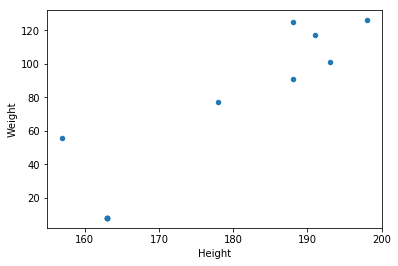

In [35]:
male_hero.plot(x = 'Height', y = 'Weight', kind = 'scatter')

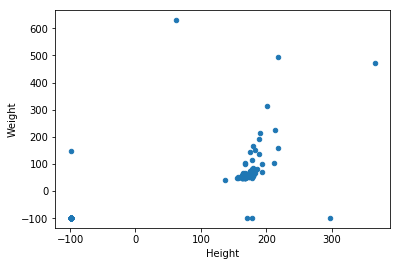

In [32]:
female_hero.plot(x='Height',y='Weight', kind = 'scatter')

In [47]:
genders = joined_df.Gender.apply(lambda x: 1 if x == 'Male' else 0)

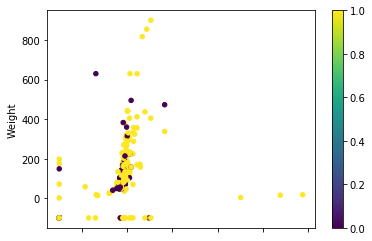

In [51]:
joined_df.plot.scatter(x='Height', y='Weight', c=genders, colormap='viridis')

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [50]:
male_heroes_df = combined_df[combined_df.Gender=='Male']
female_heroes_df = combined_df[combined_df.Gender=='Female']
def show_distplot(dataframe, column_name):
    return(sns.distplot(dataframe[column_name]))
# def show_distplot(gender, column_name):
#     if gender == 'Male':
#         x = male_heroes_df[column_name]
#     else:
#         x = female_heroes_df[column_name]
#     ax = sns.distplot(x)

In [51]:
# Male Height
show_distplot('Male','Height')


TypeError: string indices must be integers

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


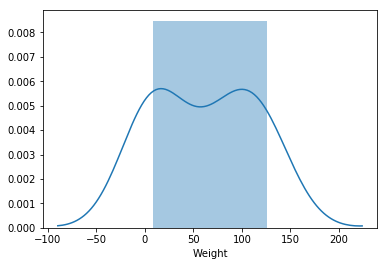

In [52]:
# Male Weight
show_distplot(male_heroes_df,'Weight')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


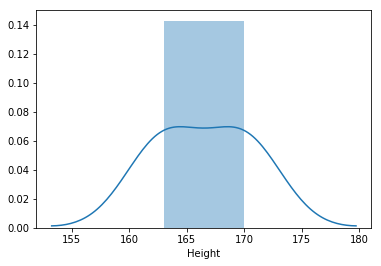

In [42]:
# Female Height
show_distplot('Female','Height')


/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


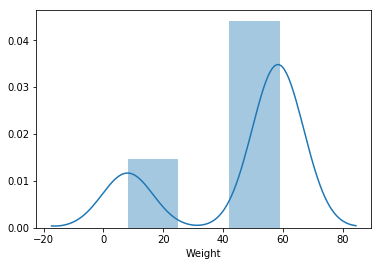

In [43]:
# Female Weight
show_distplot('Female','Weight')


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [76]:
col= list(powers_df.columns)
col.remove('hero_names')

In [44]:
combined_df.loc[:,'Agility':'Omniscient'].sum().sort_values(ascending=False).head()

Stamina           13
Super Strength    12
Durability        11
Reflexes          11
Super Speed       10
dtype: int64

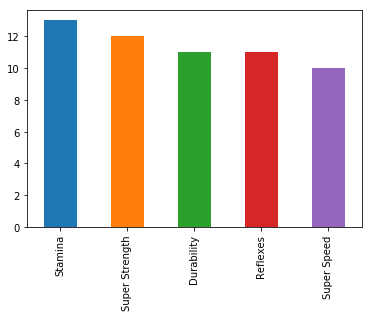

In [45]:
combined_df.loc[:,'Agility':'Omniscient'].sum().sort_values(ascending=False).head().plot.bar()

In [84]:
powers_df[col].apply(sum).sort_values(ascending = False)[:5]  # top 5 most common powers 

Super Strength    360
Stamina           289
Durability        257
Super Speed       249
Agility           242
dtype: int64

In [85]:
mask = joined_df.Publisher == 'Marvel Comics'

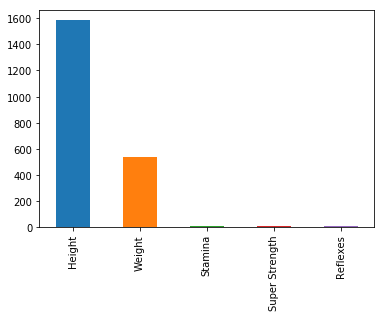

In [49]:
combined_df.groupby('Publisher').sum().loc['DC Comics'].sort_values(ascending = False).head().plot.bar()

In [86]:
joined_df[mask][col].apply(sum).sort_values(ascending = False)[:5]  # top 5 most common marvel powers 

Super Strength    204
Durability        154
Stamina           150
Super Speed       137
Agility           126
dtype: int64

In [87]:
mask2 = joined_df.Publisher == 'DC Comics'

In [88]:
joined_df[mask2][col].apply(sum).sort_values(ascending = False)[:5]  # top 5 most common DC powers 

Super Strength    109
Stamina            90
Flight             86
Super Speed        79
Agility            71
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [91]:
joined_df.groupby('Gender')[col].mean()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Gender,,,,,,,,,,,,,,,,,,,,,
-,0.235294,0.294118,0.000000,0.176471,0.058824,0.352941,0.117647,0.235294,0.470588,0.117647,...,0.058824,0.176471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.117647
Female,0.363636,0.215909,0.011364,0.005682,0.068182,0.329545,0.210227,0.107955,0.306818,0.045455,...,0.022727,0.005682,0.000000,0.000000,0.000000,0.005682,0.000000,0.000000,0.000000,0.000000
Male,0.370044,0.303965,0.019824,0.046256,0.079295,0.422907,0.191630,0.116740,0.328194,0.050661,...,0.024229,0.022026,0.004405,0.022026,0.002203,0.000000,0.002203,0.002203,0.000000,0.000000


In [92]:
joined_df.groupby('Agility')['Height','Weight'].mean()

,Height,Weight
Agility,,
False,99.304136,40.102190
True,143.813559,79.677966


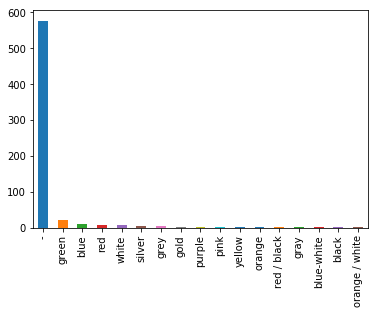

In [101]:
joined_df['Skin color'].value_counts().plot.bar()

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data